## Answer 4.4

### X is normal is nature 
### We have to run iterations n=1000

In [1]:
import numpy as np

n = 1000
mu_x = 0
sigma_x = 1
X = np.random.normal(mu_x, sigma_x, n)
beta = 5
sigma = 3
Yandx = []
for i in range (n):
  mu  = beta* X[i]
  temp = np.random.normal(mu, sigma, 1)[0]
  Yandx.append(temp)

In [19]:
missing_val_ind = np.where(np.abs(X)>2 , 1,0)
def filter_data(X,Yandx,missing_idx):
  X_new = []
  Y_new = []
  for i in range(len(missing_idx)):
    if missing_val_ind[i] == 0 :
      X_new.append(X[i])
      Y_new.append(Yandx[i])
  return X_new,Y_new
# beta_hat = sum xiyi/sum xi**2
def get_beta_hat(X,Y):
  numer = 0
  denom = 0
  for i in range(len(X)):
    numer+= X[i]*Y[i]
    denom+= X[i]**2
  beta_hat = numer/denom
  return beta_hat
X_new,Y_new = filter_data(X,Yandx,missing_val_ind)
beta_hat = get_beta_hat(X_new,Y_new)

print("Beta Hat= {:0.1f}".format(beta_hat))


Beta Hat= 5.0


(array([  3.,  17.,  54., 160., 255., 222., 182.,  79.,  24.,   4.]),
 array([-3.56244834, -2.87000028, -2.17755222, -1.48510416, -0.7926561 ,
        -0.10020803,  0.59224003,  1.28468809,  1.97713615,  2.66958421,
         3.36203228]),
 <BarContainer object of 10 artists>)

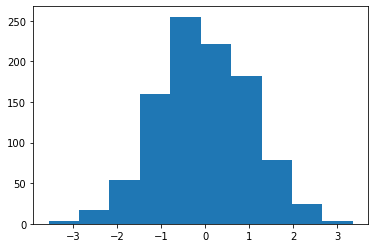

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(X_new)


(array([  5.,  18.,  86., 173., 244., 228., 161.,  64.,  19.,   2.]),
 array([-19.37088293, -15.43266722, -11.49445151,  -7.55623579,
         -3.61802008,   0.32019564,   4.25841135,   8.19662706,
         12.13484278,  16.07305849,  20.01127421]),
 <BarContainer object of 10 artists>)

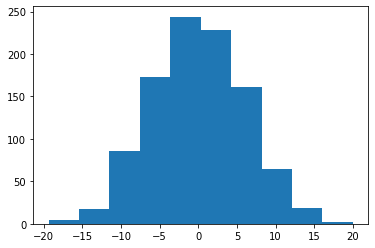

In [52]:
plt.hist(Y_new)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([4.47340283, 4.57340283, 4.67340283, 4.77340283, 4.87340283,
        4.97340283, 5.07340283, 5.17340283, 5.27340283, 5.37340283,
        5.47340283]),
 <BarContainer object of 10 artists>)

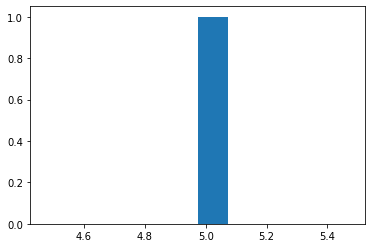

In [57]:
plt.hist(beta_hat)

#### The beta hat is consistent with the original beta with is set at = 5, (on rounding off as noticed)

## Answer 4.5

In [20]:
gamma_0 = 1
gamma_1 = 2
a = gamma_0 + gamma_1*X
missingProbability = np.exp(a)/(1+np.exp(a))
missing_val_ind = np.where(missingProbability==1.0 , 1,0)
X_new,Y_new = filter_data(X,Yandx,missing_val_ind)
beta_hat = get_beta_hat(X_new,Y_new)
print("Beta Hat={:0.1f}".format(beta_hat))


Beta Hat=5.0


When the missing values are removed based on the condition in 4.5 we can still use beta hat as a consistent estimator.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([4.47340283, 4.57340283, 4.67340283, 4.77340283, 4.87340283,
        4.97340283, 5.07340283, 5.17340283, 5.27340283, 5.37340283,
        5.47340283]),
 <BarContainer object of 10 artists>)

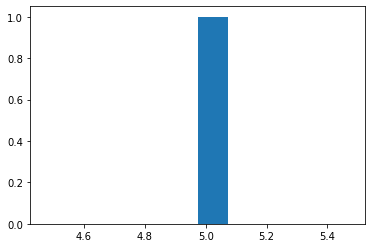

In [58]:
plt.hist(beta_hat)